In [1]:
from itertools import combinations

import pandas as pd

import csv

import glob

import os

import seaborn as sns

from sklearn import tree

from sklearn.datasets import load_iris

import pydotplus

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import numpy as np

from tqdm import tqdm

varidDurationPrefix = 'varied-'
constnatdurationPrefix = 'constant200-'

In [2]:
variedinputCSV = '/Users/mingshi/Desktop/Jupyter_dissertation-Project/Dataset/final-merge-all-varied-first-pass.csv'

constantCSVPath = '/Users/mingshi/Desktop/PythonProject/Range_alignment/final-merge-all-200ms-firstpass.csv'
data = pd.read_csv(variedinputCSV)

In [3]:
def flatten_list_of_lists(lst_of_lsts):
    return [item for sublist in lst_of_lsts for item in sublist]


def get_featureList_index() -> list[str]:
        file_paths = 'feature_name_list_compare.txt'
        filename = file_paths

        content_list = []

        with open(filename, 'r') as file:
            content_list = [line.strip() for line in file]

        feature_name_list = content_list

        return feature_name_list


In [4]:
# Nan-laughter checking
nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check
#Correctedd fixed

query_result = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'M002_S07') &
    (data['Start Time - ms'] == 313464) &
    (data['End Time - ms'] == 314672)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
    #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------   
#row 2
query_result2 = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'P017') &
    (data['Start Time - ms'] == 313354) &
    (data['End Time - ms'] == 313477)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result2.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
      #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------  
 #row 3
query_result3 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'M003_S20') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result3.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'
    
#row 4 corrected ness
query_result4 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'P043') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result4.index:
    data.at[idx, 'CV - merge - M - L - S'] ='[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'

nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check
# Transforming any concise merge type containing "null" into Ambiguous
data.loc[data['concise merge type'].str.contains('null'), 'concise merge type'] = 'Ambiguous'
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
data['concise merge type'] = data['concise merge type'].replace(discoueseV, discoureLaugh)
data['concise merge type'] = data['concise merge type'].replace(discourseS, discoureLaugh)

In [5]:
responseList = set(data['concise merge type'].tolist())
responseList

{'Ambiguous',
 'M',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse',
 '[laugh]-Mirthful'}

In [6]:
data

Session id Participant id  Start Time - ms  End Time - ms  \
0            S02           P007                0           8812   
1            S02           P007             8812           9380   
2            S02           P007             9380          18149   
3            S02           P007            18149          18620   
4            S02           P007            18620          44627   
...          ...            ...              ...            ...   
14436        S23           P049           357649         361628   
14437        S23           P049           361628         361883   
14438        S23           P049           361883         363365   
14439        S23           P049           363365         363828   
14440        S23           P049           363828         365917   

       Duration - ms CV - merge - M - L - S concise merge type  \
0               8812               Silience           Silience   
1                568                      V                  S   
2               8769               Silience           Silience   
3                471                      V                  S   
4              26007               Silience           Silience   
...              ...                    ...                ...   
14436           3979               Silience           Silience   
14437            255                      V                  S   
14438           1482               Silience           Silience   
14439            463                      V                  S   
14440           2089               Silience           Silience   

       audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
0                            0.601711                         0.359268   
1                            0.458016                         0.673469   
2                            0.348826                         0.000000   
3                            1.032122                         0.375000   
4                            0.425555                         0.023911   
...                               ...                              ...   
14436                        1.614275                         0.353846   
14437                        1.109623                         0.555556   
14438                        0.394520                         0.007092   
14439                        2.253242                         0.794872   
14440                        0.633792                         0.000000   

       audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakRangeAbs  \
0                             0.092677  ...                      7.551740   
1                             0.122449  ...                      6.117432   
2                             0.234753  ...                      5.307438   
3                             0.025000  ...                      3.362701   
4                             0.177015  ...                      7.156795   
...                                ...  ...                           ...   
14436                         0.887179  ...                      4.958942   
14437                         0.000000  ...                      0.000000   
14438                         0.737589  ...                      4.935449   
14439                         0.128205  ...                      3.618804   
14440                         0.985075  ...                      5.561443   

       mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
0                          0.609021                     2.001329   
1                          0.692077                     1.598350   
2                          0.441913                     2.102095   
3                          0.370775                     3.013800   
4                          0.576666                     2.056919   
...                             ...                          ...   
14436                      0.473761                     2.045455   
14437                      0.000000               

# F0

<Figure size 640x480 with 0 Axes>

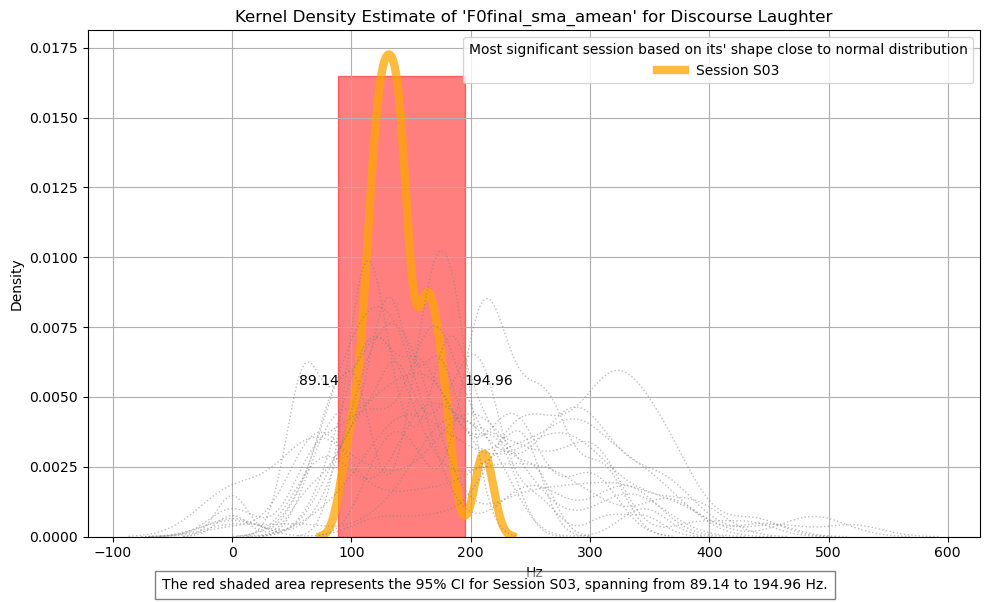

<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import norm

discourseLaugh = '[laugh]-Discourse'
feature_name = 'F0final_sma_amean'

laugh_data = data[data['concise merge type'] == discourseLaugh]

# Calculate the session with the highest peak in KDE
session_peaks = {}
for session in laugh_data['Session id'].unique():
    session_values = laugh_data[laugh_data['Session id'] == session][feature_name].values
    kde_values = sns.kdeplot(session_values, bw_adjust=0.5).get_lines()[-1].get_ydata()
    plt.clf()  # Clear the plot to prevent showing it now
    
    peaks, _ = find_peaks(kde_values)
    if peaks.size > 0:
        max_peak_height = np.max(kde_values[peaks])
        session_peaks[session] = max_peak_height

# Identify the session with the highest peak
max_peak_session = max(session_peaks, key=session_peaks.get) if session_peaks else None

plt.figure(figsize=(10, 6))

# Plot KDE for all sessions
for session in laugh_data['Session id'].unique():
    session_values = laugh_data[laugh_data['Session id'] == session][feature_name].values
    color = "orange" if session == max_peak_session else "grey"
    alpha = 0.75 if session == max_peak_session else 0.5
    linestyle = "-" if session == max_peak_session else ":"
    # change here
    linewidth = 6 if session == max_peak_session else 1  # Thinner orange line for highlighted session
    label = f"Session {session}" if session == max_peak_session else '_nolegend_'
    sns.kdeplot(session_values, color=color, alpha=alpha, linestyle=linestyle, label=label, linewidth=linewidth, bw_adjust=0.5)

if max_peak_session:
    # Calculate and display the 95% CI for the session with the highest peak
    max_session_values = laugh_data[laugh_data['Session id'] == max_peak_session][feature_name].values
    mean = np.mean(max_session_values)
    std = np.std(max_session_values)
    ci_lower, ci_upper = norm.interval(0.95, loc=mean, scale=std)

    plt.fill_betweenx([0, plt.ylim()[1]/1.1], ci_lower, ci_upper, color='red', alpha=0.5)
    plt.text(ci_lower, plt.ylim()[1]*0.3, f"{ci_lower:.2f}", horizontalalignment='right')
    plt.text(ci_upper, plt.ylim()[1]*0.3, f"{ci_upper:.2f}", horizontalalignment='left')

    plt.figtext(0.5, 0.01, f"The red shaded area represents the 95% CI for Session {max_peak_session}, spanning from {ci_lower:.2f} to {ci_upper:.2f} Hz.", ha="center", fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.title(f"Kernel Density Estimate of '{feature_name}' for Discourse Laughter")
plt.xlabel("Hz")
plt.ylabel('Density')
if max_peak_session is not None:
    plt.legend(title=f"Most significant session based on its' shape close to normal distribution")
else:
    plt.legend([],[], frameon=False)  
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('SessionImpact_F0_discouseLaughter.png')


# Auditory specturm

<Figure size 640x480 with 0 Axes>

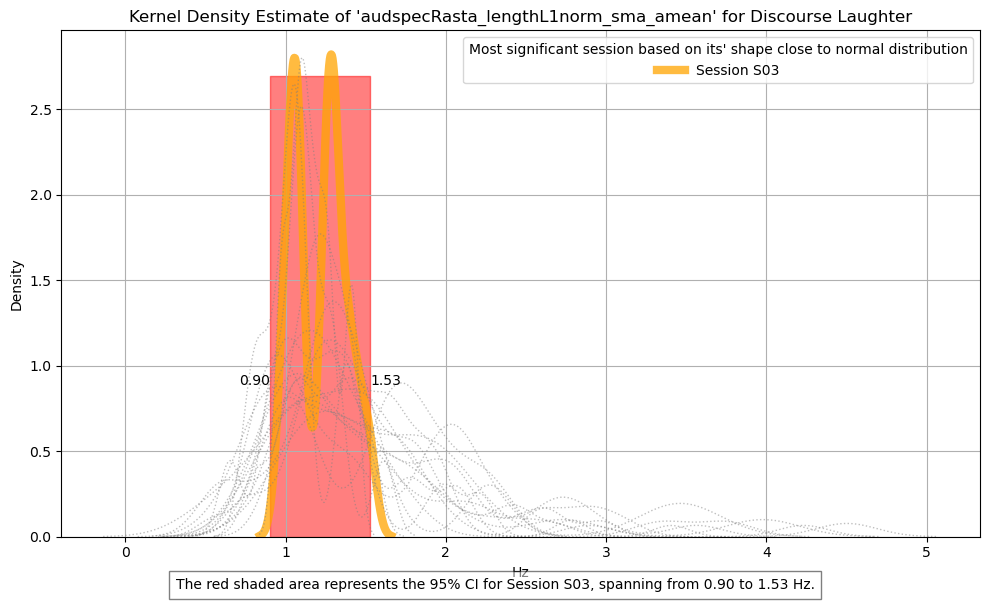

<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import norm

discourseLaugh = '[laugh]-Discourse'
feature_name =  'audspecRasta_lengthL1norm_sma_amean'

laugh_data = data[data['concise merge type'] == discourseLaugh]


# Calculate the session with the highest peak in KDE
session_peaks = {}
for session in laugh_data['Session id'].unique():
    session_values = laugh_data[laugh_data['Session id'] == session][feature_name].values
    kde_values = sns.kdeplot(session_values, bw_adjust=0.5).get_lines()[-1].get_ydata()
    plt.clf()  # Clear the plot to prevent showing it now
    
    peaks, _ = find_peaks(kde_values)
    if peaks.size > 0:
        max_peak_height = np.max(kde_values[peaks])
        session_peaks[session] = max_peak_height

# Identify the session with the highest peak
max_peak_session = max(session_peaks, key=session_peaks.get) if session_peaks else None

plt.figure(figsize=(10, 6))

# Plot KDE for all sessions
for session in laugh_data['Session id'].unique():
    session_values = laugh_data[laugh_data['Session id'] == session][feature_name].values
    color = "orange" if session == max_peak_session else "grey"
    alpha = 0.75 if session == max_peak_session else 0.5
    linestyle = "-" if session == max_peak_session else ":"
    # change here
    linewidth = 6 if session == max_peak_session else 1  # Thinner orange line for highlighted session
    label = f"Session {session}" if session == max_peak_session else '_nolegend_'
    sns.kdeplot(session_values, color=color, alpha=alpha, linestyle=linestyle, label=label, linewidth=linewidth, bw_adjust=0.5)

if max_peak_session:
    # Calculate and display the 95% CI for the session with the highest peak
    max_session_values = laugh_data[laugh_data['Session id'] == max_peak_session][feature_name].values
    mean = np.mean(max_session_values)
    std = np.std(max_session_values)
    ci_lower, ci_upper = norm.interval(0.95, loc=mean, scale=std)

    plt.fill_betweenx([0, plt.ylim()[1]/1.1], ci_lower, ci_upper, color='red', alpha=0.5)
    plt.text(ci_lower, plt.ylim()[1]*0.3, f"{ci_lower:.2f}", horizontalalignment='right')
    plt.text(ci_upper, plt.ylim()[1]*0.3, f"{ci_upper:.2f}", horizontalalignment='left')

    plt.figtext(0.5, 0.01, f"The red shaded area represents the 95% CI for Session {max_peak_session}, spanning from {ci_lower:.2f} to {ci_upper:.2f} Hz.", ha="center", fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.title(f"Kernel Density Estimate of '{feature_name}' for Discourse Laughter")
plt.xlabel("Hz")
plt.ylabel('Density')
if max_peak_session is not None:
    plt.legend(title=f"Most significant session based on its' shape close to normal distribution")
else:
    plt.legend([],[], frameon=False)  
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('SessionImpact_AudSpecturm_discouseLaughter.png')

